In [1]:
import h5py
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the .h5 file
h5_path = "../../data/outputs/bagids/0344100000157740/feats-disk.h5"

# Group and image subgroup
group_name = "Back" # Back, Fwd, Left, Right
image_name = "0344100000157740_masked_zoomed.jpg"

# Image path
img_path = f"../../data/outputs/bagids/0344100000157740/masked_full_resolution_single/{group_name}/{image_name}"

Loaded 20 keypoints for 0344100000157740_masked_zoomed.jpg, Image size: [575 961]
There are 20 keypoints


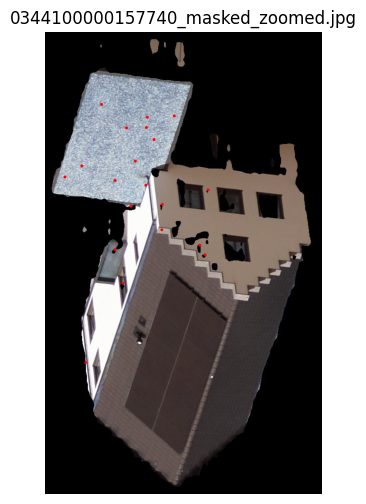

In [3]:
# Open the HDF5 file
with h5py.File(h5_path, "r") as h5f:
    # Load the keypoints
    keypoints = h5f[group_name][image_name]["keypoints"][:] # (58, 2)
    image_size = h5f[group_name][image_name]["image_size"][:] # (width, height)

    print(f"Loaded {len(keypoints)} keypoints for {image_name}, Image size: {image_size}")

    # Load the corresponding image
    image = cv2.imread(img_path)

    if image is None:
        print(f"Could not load the image. Check the path")
    else:
        # Convert keypoints to int
        keypoints = np.round(keypoints).astype(int)

        print(f"There are {len(keypoints)} keypoints")

        for kp in keypoints:
            x, y = kp
            cv2.circle(image, (x, y), 3, (0, 0, 255), -1) # Green keypoints

        # Show the image with keypoints
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(image_name)
        plt.axis('off')
        plt.show()